# Graduate Project of CNN Regression version 3.1 - Improved NN

## Initialize machine learning library

In [31]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as opt
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
print(torch.__version__)

2.6.0+cpu


### Set computing device as CPU

In [32]:
device = torch.device("cpu")
print(f"Using Device: {device}")

Using Device: cpu


## Data load in and pre-processing

In [33]:
features = pd.read_csv("/home/seb/Project/BEng-Graduate/data/data.csv", header=None)
features = features.transpose()
# features = data.values.T.astype(np.float32)
features.head()

0      1      2           3          4       5       6       7       8    \
0  70.0  200.0  300.0   28.801196  81.105366  6125.0  5690.0  6560.0   870.0   
1  70.0  200.0  400.0    2.517709  47.612011  3860.0  3840.0  3880.0    40.0   
2  70.0  200.0  500.0    3.068820  63.245190  3945.0  3920.0  3970.0    50.0   
3  70.0  200.0  600.0    5.874144  55.115136  4050.0  4000.0  4100.0   100.0   
4  70.0  200.0  700.0 -123.202804  67.654798  3635.0  4160.0  3110.0 -1050.0   

          9    ...         500         501         502         503  \
0 -120.782809  ... -118.949780 -118.499691 -118.020283 -117.503018   
1 -121.070769  ... -116.630247 -116.579676 -116.529680 -116.480227   
2 -121.322709  ... -113.516857 -113.319928 -113.096880 -112.840765   
3 -121.477196  ... -108.600004 -104.475919  -92.225585 -111.170745   
4 -121.156614  ... -116.668022 -116.650467 -116.633328 -116.616634   

          504         505         506         507         508         509  
0 -116.936596 -116.305609 -115.588315 -114.752730 -113.749309 -112.495888  
1 -116.431285 -116.382825 -116.334820 -116.287244 -116.240073 -116.193283  
2 -112.541882 -112.186250 -111.752916 -111.208943 -110.499310 -109.524470  
3 -123.172305 -140.835187 -127.837068 -124.087345 -122.231465 -121.097501  
4 -116.600387 -116.584503 -116.569146 -116.554043 -116.539304 -116.524892  

[5 rows x 510 columns]

Check data shape

In [34]:
print("data dimension:", features.shape)

data dimension: (392, 510)


### Set label and transform it into a nparray

In [35]:
labels = np.array(features.iloc[:,9:])

# Delete label in feature array
features = np.array(features.iloc[:, :9])
features.shape

(392, 9)

### Data standardization using sklearn

In [36]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)
input_features[0]

array([-1.5       , -1.5       , -1.52752523,  0.47353794,  0.91441986,
        2.55646587,  2.22862805,  2.44093019,  1.07199055])

## Constract Neural Network

### Set up a triple-layer with 256 nodes network using MSE and Adam

In [37]:
input_size = input_features.shape[1]
h1_size = 256
h2_size = 256
h3_size = 256
out_size = 501

# update error by batch
batch_size = 16

# set up neural network using package
imp_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, h1_size),
    torch.nn.ReLU(), # nn.ReLU() is also common
    torch.nn.Linear(h1_size, h2_size),
    torch.nn.ReLU(),
    torch.nn.Linear(h2_size, h3_size),
    torch.nn.ReLU(),
    torch.nn.Linear(h3_size, out_size),
)

# Using MSE Loss function
cost = torch.nn.MSELoss(reduction='mean')

# Adam optim
optimizer = torch.optim.Adam(imp_nn.parameters(), lr=0.0001)

### Training

In [38]:
losses = []
for i in range(10000):
    # Record batch loss
    batch_loss = []
    
    # Training by MINI-BATCH
    for start in range(0, len(input_features), batch_size):
        if start + batch_size < len(input_features):
            end = start + batch_size
        else:
            end = len(input_features)
        xx = torch.tensor(input_features[start:end], dtype=torch.float, requires_grad=True)
        yy = torch.tensor(labels[start:end], dtype=torch.float, requires_grad=True)
        prediction = imp_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())

    # Print loss every 100 steps
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print("Step:", i, "Loss:", np.mean(batch_loss))

Step: 0 Loss: 14049.067
Step: 100 Loss: 95.39322
Step: 200 Loss: 71.72429
Step: 300 Loss: 70.42148
Step: 400 Loss: 64.73194
Step: 500 Loss: 61.680798
Step: 600 Loss: 56.721954
Step: 700 Loss: 54.63654
Step: 800 Loss: 51.81833
Step: 900 Loss: 48.78214
Step: 1000 Loss: 44.93892
Step: 1100 Loss: 40.49601
Step: 1200 Loss: 36.116898
Step: 1300 Loss: 31.607498
Step: 1400 Loss: 29.21965
Step: 1500 Loss: 28.055984
Step: 1600 Loss: 27.380146
Step: 1700 Loss: 26.99572
Step: 1800 Loss: 26.699326
Step: 1900 Loss: 26.414614
Step: 2000 Loss: 26.220608
Step: 2100 Loss: 26.064537
Step: 2200 Loss: 25.923834
Step: 2300 Loss: 25.825188
Step: 2400 Loss: 25.771614
Step: 2500 Loss: 25.650791
Step: 2600 Loss: 25.5586
Step: 2700 Loss: 25.382793
Step: 2800 Loss: 25.271938
Step: 2900 Loss: 25.167793
Step: 3000 Loss: 25.047623
Step: 3100 Loss: 24.930822
Step: 3200 Loss: 24.78745
Step: 3300 Loss: 24.686518
Step: 3400 Loss: 24.539272
Step: 3500 Loss: 24.419182
Step: 3600 Loss: 24.325659
Step: 3700 Loss: 24.215757


### Predict training results

In [29]:
x = torch.tensor(input_features,dtype=torch.float)
predict = imp_nn(x).data.numpy()
predict.shape

(392, 501)

### Compare predictions to actural values

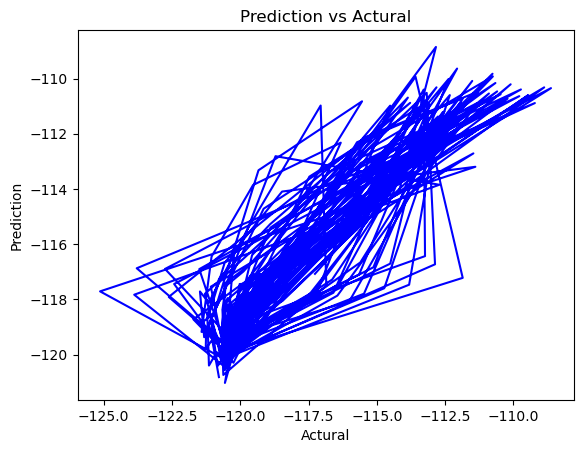

In [30]:
# Set group number array
# group_num = np.arange(1, 393)

# Compare actural values with prediction
plt.plot(labels[:, 0], predict[:, 0], 'b-')

# Set graph config
plt.xlabel('Actural'); plt.ylabel('Prediction'); plt.title('Prediction vs Actural')
plt.show()